## Best result: 88.51%

### Things to do

- reduced the train size, i.e., adjusted train test split. - DONE
- Increase the number of training samples set to 10,000 - DONE
- reduce learning rate (from 0.001 to 0.0001) the increased back to 0.0005 - DONE
- add extra layers to the network - NOW
- increase the feature vector size

### A Note on Tuning Hyperparameters

The following are the hypterparameters I can tune with.
- Number of samples per class.
- Learning rate
- FFT size (this may force us to change the network architecture, i.e., number of layers and number of nodes per layer.)
- FFT overlap
- Epoch size

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Functions

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

### Loading an EM Trace and Plotting

#### Settings:

In [3]:
# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [4]:
labels = ["calender-app", "camera-photo", "camera-video", "email-app", "gallary-app"
          , "home-screen", "idle-device", "phone-app", "sms-app", "web-browser"]

#### Preparing the Data of Class 0

In [5]:
class_label = 0

In [6]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/calandar-app.cfile")

In [7]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

/home/asanka/miniconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
33428
(2048, 33428)


In [8]:
del data

In [9]:
Zxx = Zxx.transpose()

In [10]:
X = Zxx[:num_samp_per_class]
y = np.full(num_samp_per_class, class_label)
del Zxx

In [11]:
print(X.shape)
print(y.shape)

(10000, 2048)
(10000,)


#### Preparing the Data of Class 1

In [12]:
class_label = 1

In [13]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/camera-photo.cfile")

In [14]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
38645
(2048, 38645)


In [15]:
del data

In [16]:
Zxx = Zxx.transpose()

In [17]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [18]:
print(X.shape)
print(y.shape)

(20000, 2048)
(20000,)


#### Preparing the Data of Class 2

In [19]:
class_label = 2

In [20]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/camera-video.cfile")

In [21]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
48315
(2048, 48315)


In [22]:
del data

In [23]:
Zxx = Zxx.transpose()

In [24]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [25]:
print(X.shape)
print(y.shape)

(30000, 2048)
(30000,)


#### Preparing the Data of Class 3

In [26]:
class_label = 3

In [27]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/email-app.cfile")

In [28]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
36129
(2048, 36129)


In [29]:
del data

In [30]:
Zxx = Zxx.transpose()

In [31]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [32]:
print(X.shape)
print(y.shape)

(40000, 2048)
(40000,)


#### Preparing the Data of Class 4

In [33]:
class_label = 4

In [34]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/gallary-app.cfile")

In [35]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
40949
(2048, 40949)


In [36]:
del data

In [37]:
Zxx = Zxx.transpose()

In [38]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [39]:
print(X.shape)
print(y.shape)

(50000, 2048)
(50000,)


#### Preparing the Data of Class 5

In [40]:
class_label = 5

In [41]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/home-screen.cfile")

In [42]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
38694
(2048, 38694)


In [43]:
del data

In [44]:
Zxx = Zxx.transpose()

In [45]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [46]:
print(X.shape)
print(y.shape)

(60000, 2048)
(60000,)


#### Preparing the Data of Class 6

In [47]:
class_label = 6

In [48]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/idle.cfile")

In [49]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
42242
(2048, 42242)


In [50]:
del data

In [51]:
Zxx = Zxx.transpose()

In [52]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [53]:
print(X.shape)
print(y.shape)

(70000, 2048)
(70000,)


#### Preparing the Data of Class 7

In [54]:
class_label = 7

In [55]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/phone-app.cfile")

In [56]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
34233
(2048, 34233)


In [57]:
del data

In [58]:
Zxx = Zxx.transpose()

In [59]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [60]:
print(X.shape)
print(y.shape)

(80000, 2048)
(80000,)


#### Preparing the Data of Class 8

In [61]:
class_label = 8

In [62]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/sms-app.cfile")

In [63]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
42207
(2048, 42207)


In [64]:
del data

In [65]:
Zxx = Zxx.transpose()

In [66]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [67]:
print(X.shape)
print(y.shape)

(90000, 2048)
(90000,)


#### Preparing the Data of Class 9

In [68]:
class_label = 9

In [69]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/web-browser-app.cfile")

In [70]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
33209
(2048, 33209)


In [71]:
del data

In [72]:
Zxx = Zxx.transpose()

In [73]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [74]:
print(X.shape)
print(y.shape)

(100000, 2048)
(100000,)


### Building the Model

In [75]:
X = abs(X)

# scaling the features (only real part of the data can be used)
scaler = MinMaxScaler()
scaler.fit(X)
print(scaler.data_max_)
X = scaler.transform(X)

[0.04209983 0.02760862 0.02790638 ... 0.02090047 0.02404625 0.03802438]


In [76]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [77]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))

model.add(keras.layers.Dense(1400, activation="relu"))

model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
#model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1400)              2868600   
_________________________________________________________________
dense_1 (Dense)              (None, 800)               1120800   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               400500    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 4,511,210
Trainable params: 4,511,210
Non-trainable params: 0
______________________________________________

In [80]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [81]:
#history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
2532/2532 [==============================] - 50s 20ms/step - loss: 2.2189 - accuracy: 0.2251 - val_loss: 2.1846 - val_accuracy: 0.2260
Epoch 2/30
2532/2532 [==============================] - 52s 20ms/step - loss: 2.1213 - accuracy: 0.3039 - val_loss: 2.0518 - val_accuracy: 0.3546
Epoch 3/30
2532/2532 [==============================] - 51s 20ms/step - loss: 1.9801 - accuracy: 0.3536 - val_loss: 1.9232 - val_accuracy: 0.3221
Epoch 4/30
2532/2532 [==============================] - 51s 20ms/step - loss: 1.8576 - accuracy: 0.3535 - val_loss: 1.7887 - val_accuracy: 0.3731
Epoch 5/30
2532/2532 [==============================] - 52s 21ms/step - loss: 1.6859 - accuracy: 0.4163 - val_loss: 1.5862 - val_accuracy: 0.4149
Epoch 6/30
2532/2532 [==============================] - 52s 21ms/step - loss: 1.4916 - accuracy: 0.4763 - val_loss: 1.4187 - val_accuracy: 0.4858
Epoch 7/30
2532/2532 [==============================] - 52s 21ms/step - loss: 1.3630 - accuracy: 0.5096 - val_loss: 1.3173 -

### Plotting

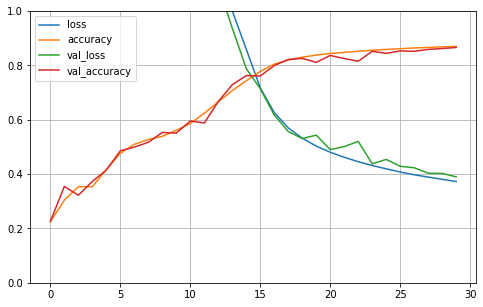

In [82]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [83]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
2532/2532 [==============================] - 52s 20ms/step - loss: 0.3647 - accuracy: 0.8730 - val_loss: 0.3832 - val_accuracy: 0.8581
Epoch 2/10
2532/2532 [==============================] - 52s 20ms/step - loss: 0.3585 - accuracy: 0.8740 - val_loss: 0.3864 - val_accuracy: 0.8571
Epoch 3/10
2532/2532 [==============================] - 51s 20ms/step - loss: 0.3527 - accuracy: 0.8749 - val_loss: 0.3527 - val_accuracy: 0.8708
Epoch 4/10
2532/2532 [==============================] - 51s 20ms/step - loss: 0.3467 - accuracy: 0.8770 - val_loss: 0.3524 - val_accuracy: 0.8713
Epoch 5/10
2532/2532 [==============================] - 51s 20ms/step - loss: 0.3408 - accuracy: 0.8783 - val_loss: 0.3754 - val_accuracy: 0.8656
Epoch 6/10
2532/2532 [==============================] - 52s 21ms/step - loss: 0.3363 - accuracy: 0.8788 - val_loss: 0.4890 - val_accuracy: 0.8152
Epoch 7/10
2532/2532 [==============================] - 53s 21ms/step - loss: 0.3313 - accuracy: 0.8811 - val_loss: 0.3385 -

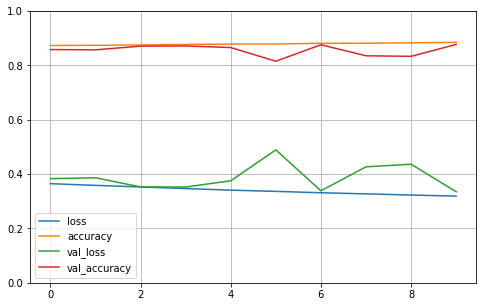

In [84]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [85]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
2532/2532 [==============================] - 52s 20ms/step - loss: 0.3149 - accuracy: 0.8860 - val_loss: 0.3385 - val_accuracy: 0.8710
Epoch 2/10
2532/2532 [==============================] - 52s 20ms/step - loss: 0.3110 - accuracy: 0.8867 - val_loss: 0.3427 - val_accuracy: 0.8727
Epoch 3/10
2532/2532 [==============================] - 52s 20ms/step - loss: 0.3076 - accuracy: 0.8879 - val_loss: 0.3283 - val_accuracy: 0.8782
Epoch 4/10
2532/2532 [==============================] - 52s 21ms/step - loss: 0.3043 - accuracy: 0.8889 - val_loss: 0.3214 - val_accuracy: 0.8808
Epoch 5/10
2532/2532 [==============================] - 51s 20ms/step - loss: 0.3013 - accuracy: 0.8910 - val_loss: 0.3272 - val_accuracy: 0.8788
Epoch 6/10
2532/2532 [==============================] - 52s 20ms/step - loss: 0.2994 - accuracy: 0.8902 - val_loss: 0.3397 - val_accuracy: 0.8712
Epoch 7/10
2532/2532 [==============================] - 52s 21ms/step - loss: 0.2964 - accuracy: 0.8917 - val_loss: 0.3244 -

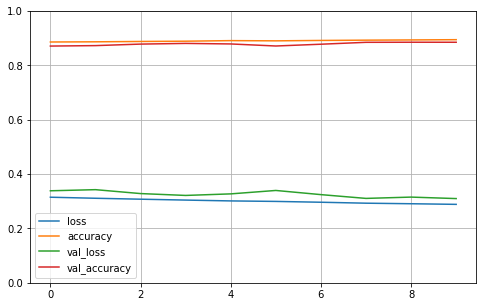

In [86]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [87]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
2532/2532 [==============================] - 52s 20ms/step - loss: 0.2865 - accuracy: 0.8943 - val_loss: 0.3234 - val_accuracy: 0.8778
Epoch 2/10
2532/2532 [==============================] - 52s 21ms/step - loss: 0.2843 - accuracy: 0.8955 - val_loss: 0.3187 - val_accuracy: 0.8801
Epoch 3/10
2532/2532 [==============================] - 58s 23ms/step - loss: 0.2820 - accuracy: 0.8956 - val_loss: 0.3974 - val_accuracy: 0.8497
Epoch 4/10
2532/2532 [==============================] - 59s 23ms/step - loss: 0.2800 - accuracy: 0.8964 - val_loss: 0.3380 - val_accuracy: 0.8728
Epoch 5/10
2532/2532 [==============================] - 52s 20ms/step - loss: 0.2786 - accuracy: 0.8963 - val_loss: 0.3086 - val_accuracy: 0.8846
Epoch 6/10
2532/2532 [==============================] - 52s 20ms/step - loss: 0.2753 - accuracy: 0.8992 - val_loss: 0.3330 - val_accuracy: 0.8771
Epoch 7/10
2532/2532 [==============================] - 52s 20ms/step - loss: 0.2746 - accuracy: 0.8990 - val_loss: 0.4206 -

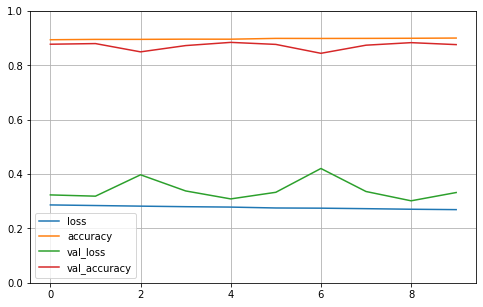

In [88]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Testing the Model

In [99]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 8ms/step - loss: 0.3403 - accuracy: 0.8747
test loss, test acc: [0.34025049209594727, 0.8747000098228455]


In [100]:
y_pred = model.predict(X_test)

In [101]:
print(y_pred.shape)

(10000, 10)


In [102]:
print(y_pred[0])

[3.7329876e-01 4.0217942e-12 4.5768793e-09 2.3463698e-09 6.2478167e-01
 1.8632060e-03 1.7511477e-15 7.0946728e-11 5.6247427e-05 1.3341153e-07]


In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [103]:
print(confusion_matrix(y_test, y_pred.argmax(axis=0)))
print(classification_report(y_test, y_pred.argmax(axis=0)))

ValueError: Found input variables with inconsistent numbers of samples: [10000, 10]

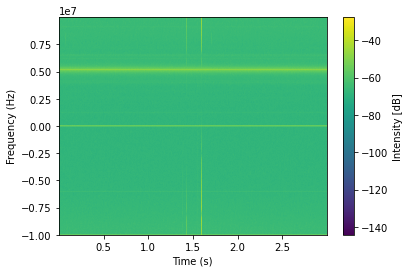

In [81]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/calandar-app.cfile")

fig = plt.figure()
pxx, freq, t, cax = plt.specgram(data, NFFT=1024, Fs=20e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

### Saving the Model

In [90]:
model.save("./1.Apple-iPhone-4S-Analysis.h5")